# LDA Clustering

Task: Visualise topic model-based document clustering on a sample dataset.

In [37]:
import pandas as pd
import numpy as np
import preprocessing
from tqdm import tqdm
import os

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from preprocessing import get_clean_write
import data_access
from my_lda import MyCorpus, doc_topic_matrix

### Create sample metadata table

In [6]:
# # import metadata
# df = preprocessing.load_cleaned_metadata('data/processed/metadata_apr21.csv')
# len(df)

In [7]:
# mask = df.pdf_json_files.notnull() | df.pmc_json_files.notnull()
# df = df[mask]
# len(df)

In [8]:
# df.to_csv('data/processed/metadata_lda_sample.csv', sep='\t')

In [9]:
df = pd.read_csv('data/processed/metadata_lda_sample.csv', index_col=0, sep='\t')
len(df)

2523

### Clean text and put files into directory

In [50]:
# dest_directory = 'data/cord-19/body_text/lda_sample_clean/'
# ids = df.cord_uid.tolist()

# for uid in tqdm(ids):
#     get_clean_write(uid, dest_directory)

100%|██████████| 2523/2523 [02:30<00:00, 16.76it/s]


### Create corpus and dictionary

In [51]:
# # make corpus from directory

# directory = 'data/cord-19/body_text/lda_sample_clean/'
# doc_path_list = [directory + file for file in os.listdir(directory) if file.endswith('.txt')]

# corpus = MyCorpus(doc_path_list)

In [53]:
# save_directory = 'results/lda_sample/'
# corpus.make_dictionary(save_directory=save_directory, file_name="dictionary")

Creating dictionary...
...complete
Saving dictionary to results/lda_sample/


In [54]:
# # filter extremes
# corpus.filter_extremes(no_below=3, no_above=0.2)

In [14]:
corpus_directory = 'data/cord-19/body_text/lda_sample_clean/'
dict_path = 'results/lda_sample/dictionary.dict'

doc_path_list = [corpus_directory + file for file in os.listdir(corpus_directory) if file.endswith('.txt')]

dictionary = Dictionary.load(dict_path)
corpus = MyCorpus(doc_path_list, dictionary=dictionary)

### Train model

In [57]:
# model = LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=0.5)
# model.save('results/lda_sample/model')

In [15]:
# load above model from file
model = LdaModel.load('results/lda_sample/model')

### Visualise topics

In [59]:
# topic_vis = gensimvis.prepare(model, corpus, corpus.dictionary)
# pyLDAvis.save_html(topic_vis, 'results/lda_sample/topic_vis.html')

### Create document-topic matrix

In [25]:
dtm = doc_topic_matrix(corpus, model)

### Run PCA

In [26]:
pca = PCA(n_components=2, random_state=458).fit(dtm)
dtm_pca = pca.transform(dtm)

In [27]:
dtm_pca.shape

(2523, 2)

### Visualise

<AxesSubplot:>

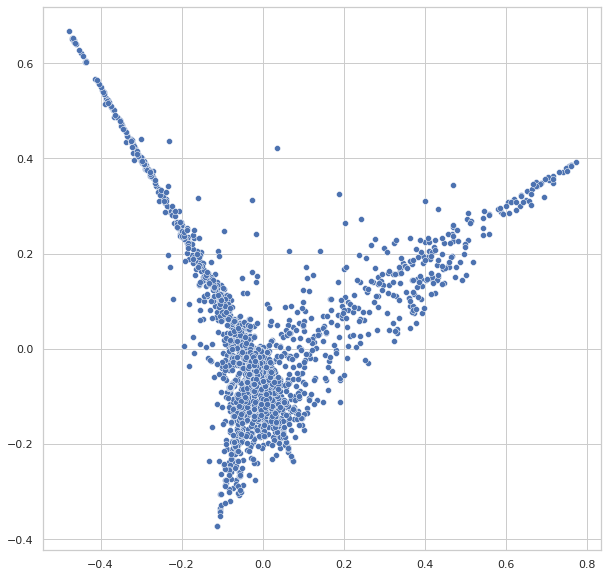

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=dtm_pca[:,0], y=dtm_pca[:,1])

### Cluster, _then_ visualise

In [54]:
# choose k

# log mean squared distance for each k
scores = []
for i in tqdm(range(20, 100)):
    km = KMeans(n_clusters=i)
    km.fit(dtm)
    scores.append(km.inertia_)

100%|██████████| 80/80 [4:22:50<00:00, 197.13s/it]  


In [55]:
with open('results/lda_sample/kmeans_scores_20-100.txt', 'w') as file:
    for score in scores:
        file.write(str(score) + '\n')

Text(0, 0.5, 'Mean Squared Distance')

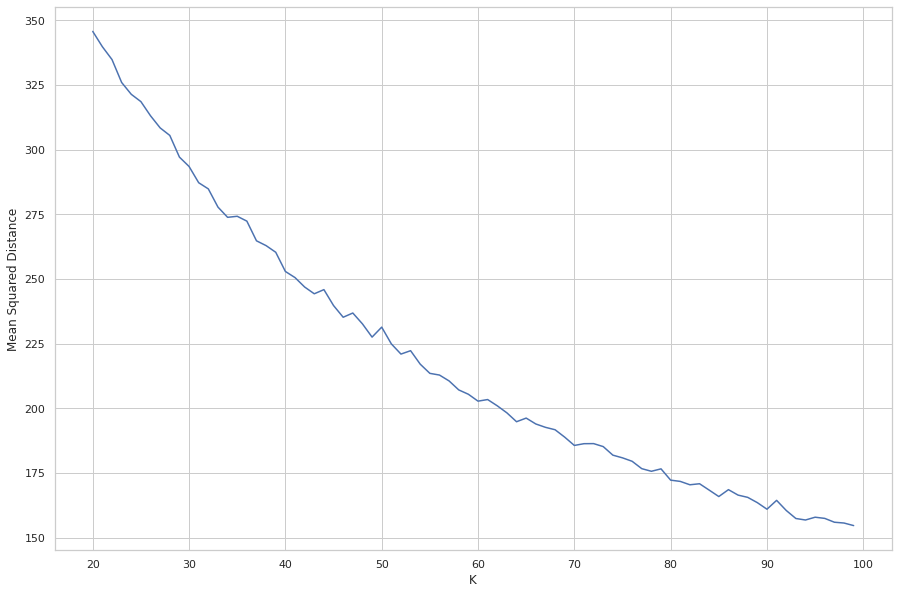

In [57]:
# plot elbow plot
plt.figure(figsize=(15,10))
plt.plot(range(20,100), scores)
plt.xlabel('K')
plt.ylabel('Mean Squared Distance')